In [43]:
#importing neccesary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Reading data from housing.csv file

In [44]:
df = pd.read_csv("housing.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14295 entries, 0 to 14294
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      14295 non-null  float64
 1   HouseAge    14295 non-null  float64
 2   AveRooms    14295 non-null  float64
 3   AveBedrms   14295 non-null  float64
 4   Population  14295 non-null  float64
 5   AveOccup    14295 non-null  float64
 6   Price       14295 non-null  float64
dtypes: float64(7)
memory usage: 781.9 KB


In [46]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
count,14295.000000,14295.000000,14295.000000,14295.000000,14295.000000,14295.000000,14295.000000
mean,1.381749,28.905981,2.293960,1.024651,36.409892,1.688123,2.013281
std,0.127626,12.296377,0.210761,0.028136,9.577295,0.157187,1.013173
min,1.104666,2.000000,1.757061,0.969171,17.521415,1.372738,0.149990
25%,1.285748,19.000000,2.148261,1.004264,29.529646,1.573042,1.250000
50%,1.382207,29.000000,2.299221,1.022433,35.028560,1.678995,1.834000
75%,1.475409,37.000000,2.440611,1.042793,41.874813,1.792131,2.560000
max,1.668303,52.000000,2.854207,1.103876,68.724086,2.074252,5.000010


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [48]:
from sklearn.model_selection import train_test_split,cross_val_score

####  data preprocessing step that is done when preparing data for modeling.

In [49]:
X = df.drop(columns=['Price'])
y = df['Price']

#### This code block is splitting the data into training and testing sets using the train_test_split function from scikit-learn.

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [51]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((11436, 6), (2859, 6), (11436,), (2859,))

In [86]:
models = []
models.append(('Linear Regression',LinearRegression()))
models.append(('Decison Tree Regressor',DecisionTreeRegressor()))
models.append(('Random Forest Regressor',RandomForestRegressor()))

#### Training our model by giving them train data

#### iterating over a list of models, and then printing various evaluation metrics and visualizations for each model

####  comparing the performance of models on a  dataset, and to choose the best one based on the evaluation metrics and visualizations.

Linear Regression
Train Score:  0.5719249602778292
Test Score:  0.5969361752595723
Mean Squared error:  0.40560212994892364
Mean Absolute error:  0.49466268673693503
Cross validation Score:  0.5200829681844706



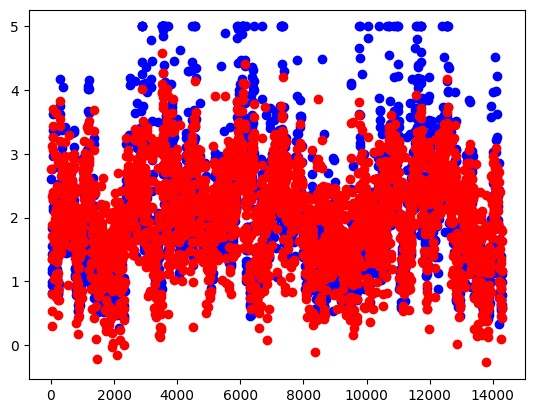


Decison Tree Regressor
Train Score:  1.0
Test Score:  0.30846802749741575
Mean Squared error:  0.6958869135811472
Mean Absolute error:  0.6050303777544596
Cross validation Score:  0.19107972668575363



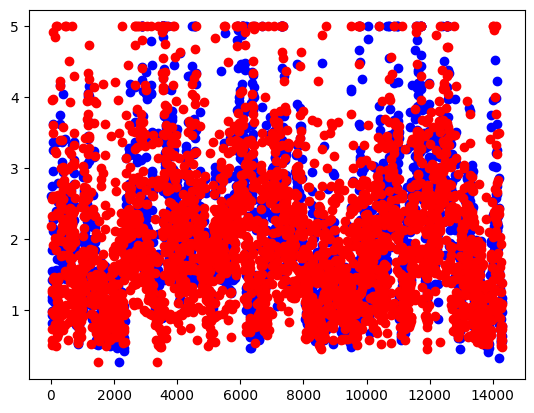


Random Forest Regressor
Train Score:  0.948747344795467
Test Score:  0.6554900403320401
Mean Squared error:  0.3466795203462647
Mean Absolute error:  0.4418823125218608
Cross validation Score:  0.5603028113103431



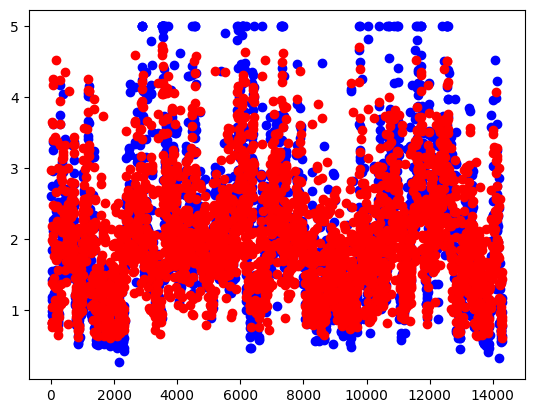

In [62]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("Train Score: ",model.score(X_train,y_train))
    print("Test Score: ",model.score(X_test,y_test))
    print("Mean Squared error: ",mean_squared_error(y_test,pred))
    print("Mean Absolute error: ",mean_absolute_error(y_test,pred))
    cv_results = cross_val_score(model,X,y,cv=5)
    print("Cross validation Score: ",cv_results.mean())
    actual_pred = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
    print()
    plt.scatter(actual_pred['Actual'].index,actual_pred['Actual'],color='blue')

    plt.scatter(actual_pred['Predicted'].index,actual_pred['Predicted'],color='red')
    plt.show()
    print()

#####  we choose random fores based on The cross validation score which represents the average accuracy of the model on the test sets across the 5 different splits.
##### Random Forest Regressor is giving the best Scores among the used models i.e 56% CV Scores.
- HyperParameter Tuning on Random Forest Regressor using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
tuned_parameters = {'max_depth': [30,50,70,90], 'min_samples_split': [20,40,60]}

#### to find best performance of the model.

In [65]:
grid_search  = GridSearchCV(RandomForestRegressor(),tuned_parameters,cv=5)

In [66]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [30, 50, 70, 90],
                         'min_samples_split': [20, 40, 60]})

In [67]:
grid_search.best_params_

{'max_depth': 50, 'min_samples_split': 20}

Train Score:  0.8251349997798564
Test Score:  0.6621658711784522
Mean Squared error:  0.3399616482766805
Mean Absolute error:  0.4375050385808415
Cross validation Score:  0.5704005216727482



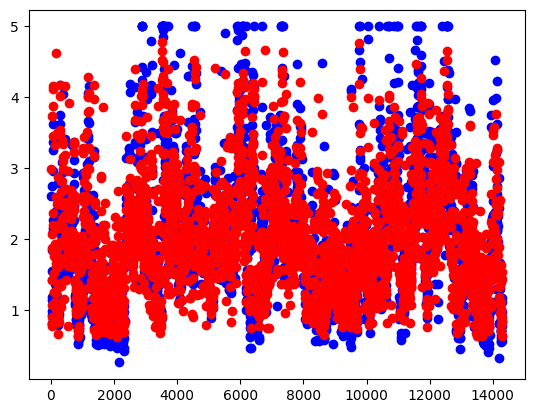

In [95]:
model = RandomForestRegressor(max_depth=50,min_samples_split=20)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("Train Score: ",model.score(X_train,y_train))
print("Test Score: ",model.score(X_test,y_test))
print("Mean Squared error: ",mean_squared_error(y_test,pred))
print("Mean Absolute error: ",mean_absolute_error(y_test,pred))
cv_results = cross_val_score(model,X,y,cv=5)
print("Cross validation Score: ",cv_results.mean())
actual_pred = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
print()
plt.scatter(actual_pred['Actual'].index,actual_pred['Actual'],color='blue')
plt.scatter(actual_pred['Predicted'].index,actual_pred['Predicted'],color='red')
plt.show()
print()

In [69]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,1.541273,52.0,2.411919,1.035886,23.622024,1.596228,3.413
1,1.400419,52.0,2.506363,1.039750,23.769729,1.476979,3.422
2,1.417455,52.0,2.182122,1.050537,20.322401,1.462838,2.697
3,1.383068,52.0,2.220790,0.975378,33.075671,1.458905,2.992
4,1.200983,42.0,2.072225,1.057188,34.727511,1.423689,2.267
...,...,...,...,...,...,...,...
14290,1.388087,28.0,2.603665,1.071567,32.264532,1.739587,1.168
14291,1.117640,25.0,2.246209,1.064581,29.068884,1.600189,0.781
14292,1.141858,17.0,2.281566,1.058344,31.733263,1.525003,0.923
14293,1.168955,18.0,2.308574,1.082552,27.221315,1.457124,0.847


In [96]:
model.predict([np.array([1.668303	,52.000000	,2.854207	,1.103876	,68.724086	,2.074252])])

c:\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.28088257])

In [74]:
import pickle

In [83]:
pickle.dump(model,open('model.pkl','wb'))

### So the Best Models are  RandomForestRegressor With 56% CV Scores